In [6]:
import pandas as pd
from fastdtw import fastdtw
import numpy as np

In [24]:
df = pd.read_csv("dow_jones_index/dow_jones_index.data", parse_dates=['date'])
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,2011-01-14,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,2011-01-21,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,2011-01-28,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2011-02-04,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [25]:
df.dtypes

quarter                                        int64
stock                                         object
date                                  datetime64[ns]
open                                          object
high                                          object
low                                           object
close                                         object
volume                                         int64
percent_change_price                         float64
percent_change_volume_over_last_wk           float64
previous_weeks_volume                        float64
next_weeks_open                               object
next_weeks_close                              object
percent_change_next_weeks_price              float64
days_to_next_dividend                          int64
percent_return_next_dividend                 float64
dtype: object

To convert the closing price to a number, we apply an anonymous function that takes
all characters but the dollar sign and casts it as a float.

In [33]:
df.close = df.close.apply( lambda x: float(x[1:]))
df.dtypes

quarter                                        int64
stock                                         object
date                                  datetime64[ns]
open                                          object
high                                          object
low                                           object
close                                        float64
volume                                         int64
percent_change_price                         float64
percent_change_volume_over_last_wk           float64
previous_weeks_volume                        float64
next_weeks_open                               object
next_weeks_close                              object
percent_change_next_weeks_price              float64
days_to_next_dividend                          int64
percent_return_next_dividend                 float64
dtype: object

In [34]:
df_pivot = df.pivot('stock','date','close').reset_index()
df_pivot.head()
# df_pivot.dtypes

date,stock,2011-01-07 00:00:00,2011-01-14 00:00:00,2011-01-21 00:00:00,2011-01-28 00:00:00,2011-02-04 00:00:00,2011-02-11 00:00:00,2011-02-18 00:00:00,2011-02-25 00:00:00,2011-03-04 00:00:00,...,2011-04-21 00:00:00,2011-04-29 00:00:00,2011-05-06 00:00:00,2011-05-13 00:00:00,2011-05-20 00:00:00,2011-05-27 00:00:00,2011-06-03 00:00:00,2011-06-10 00:00:00,2011-06-17 00:00:00,2011-06-24 00:00:00
0,AA,16.42,15.97,15.79,16.13,17.14,17.37,17.28,16.68,16.58,...,16.97,17.00,17.15,17.10,16.26,16.48,15.92,15.28,14.72,15.23
1,AXP,44.36,46.25,46.00,43.86,43.82,46.75,45.53,43.53,43.72,...,47.11,49.08,50.20,49.49,51.19,51.13,49.28,47.74,48.50,48.34
2,BA,69.38,70.07,71.68,69.23,71.38,72.14,73.04,72.30,71.80,...,75.44,79.78,79.31,79.03,77.52,76.99,74.84,72.69,74.16,71.26
3,BAC,14.25,15.25,14.25,13.60,14.29,14.77,14.75,14.20,14.12,...,12.31,12.28,12.31,11.93,11.58,11.69,11.28,10.80,10.68,10.52
4,CAT,93.73,94.01,92.75,95.68,99.59,103.54,105.86,102.00,103.04,...,109.42,115.41,110.34,106.33,104.33,104.60,101.10,96.79,95.95,100.01


In [35]:
import numpy as np
from sklearn.manifold import MDS
# mds_coords = MDS().fit_transform(distances)
correlations = np.corrcoef(np.float64(np.array(df_pivot)[:,2:]))
mds_coords = MDS().fit_transform(correlations)

/Users/richard.mcmaster/anaconda3/lib/python3.6/site-packages/sklearn/manifold/mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


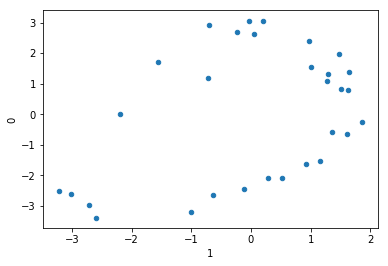

In [36]:
pd.DataFrame(mds_coords).plot(kind='scatter',x=1,y=0)

In [37]:
df_pivot.iloc[0:2].transpose().iloc[2:].plot(kind='scatter',x=0,y=1)

ValueError: scatter requires x column to be numeric

/Users/richard.mcmaster/anaconda3/lib/python3.6/site-packages/sklearn/manifold/mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


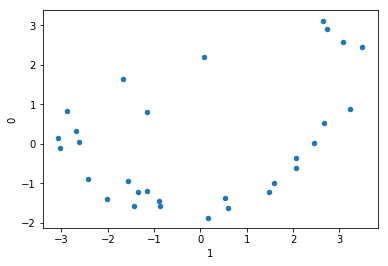

In [38]:
import numpy as np
correlations = np.corrcoef(np.float64(np.array(df_pivot)[:,2:]))
mds_coords = MDS().fit_transform(correlations)
pd.DataFrame(mds_coords).plot(kind='scatter',x=1,y=0)


In [39]:
tpd = df_pivot.iloc[0:2].transpose().iloc[1:]
tpd.dtypes

0    object
1    object
dtype: object

In [40]:
print(pd.to_numeric(tpd['0'], errors='ignore'))
tpd.columns

KeyError: '0'

In [41]:
df_pivot2 = df.pivot_table(index=['stock'], columns=['date'], values=['close'],dropna=True, fill_value='')

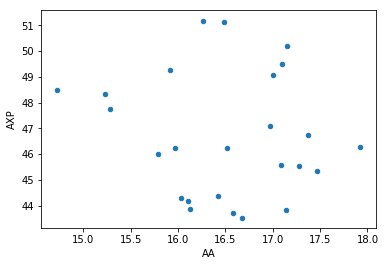

In [42]:
df_pivot2.head(2).transpose().plot(kind='scatter',x=0,y=1)

/Users/richard.mcmaster/anaconda3/lib/python3.6/site-packages/sklearn/manifold/mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


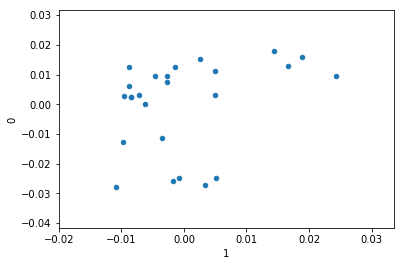

In [43]:
import scipy.stats
correlations2 = scipy.stats.spearmanr(np.float64(np.array(df_pivot)
[:,1:]))
mds_coords = MDS().fit_transform(correlations2.correlation)
pd.DataFrame(mds_coords).plot(kind='scatter',x=1,y=0)

In [44]:
pd.DataFrame(mds_coords).head()

,0,1
0,-0.027974,-0.010885
1,-0.025935,-0.001807
2,-0.024737,-0.000772
3,-0.024854,0.005203
4,-0.027093,0.003394


In [0]:
%%bash
# pip install fastdtw

In [45]:
dtw_matrix = np.zeros(shape=(df_pivot.shape[0],df_pivot.shape[0]))
for i in np.arange(0,df_pivot.shape[0]):
    for j in np.arange(i+1,df_pivot.shape[0]):
        dtw_matrix[i,j] = fastdtw(df_pivot.iloc[i,2:],df_pivot.iloc[j,2:])[0]

In [46]:
dtw_matrix+=dtw_matrix.transpose()

In [47]:
dtw_matrix

array([[   0.  ,  727.26, 1370.63,   82.03, 2088.88,   31.57, 2042.01,
         875.89,  595.6 ,   79.98,  483.43,  597.13, 3533.42,  119.03,
        1106.8 ,  672.66, 1174.05,  386.56, 1461.2 , 1810.03,  425.47,
         223.23,   81.01, 1139.36,  315.63, 1029.48, 1625.56,  479.62,
         897.55, 1581.01],
       [ 727.26,    0.  ,  643.37,  811.41, 1361.62,  696.94, 1314.75,
         109.43,  131.66,  647.28,  243.83,  151.93, 2806.16,  608.23,
         379.54,   80.85,  446.79,  340.7 ,  733.94, 1082.77,  301.79,
         504.03,  646.25,  412.1 ,  411.63,  302.22,  898.3 ,  247.64,
         170.29,  853.75],
       [1370.63,  643.37,    0.  , 1454.78,  718.25, 1340.31,  671.38,
         494.74,  775.03, 1290.65,  887.2 ,  773.5 , 2162.79, 1251.6 ,
         263.83,  697.97,  196.58,  984.07,   83.61,  439.4 ,  945.16,
        1147.4 , 1289.62,  231.27, 1055.  ,  341.15,  252.13,  891.01,
         473.08,  173.84],
       [  82.03,  811.41, 1454.78,    0.  , 2173.03,  113.19, 2126.

/Users/richard.mcmaster/anaconda3/lib/python3.6/site-packages/sklearn/manifold/mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


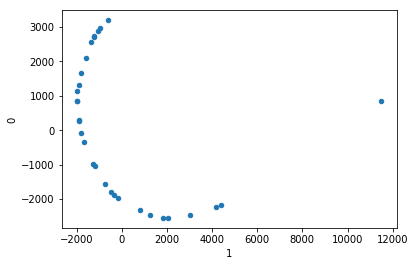

In [48]:
mds_coords = MDS().fit_transform(dtw_matrix)
pd.DataFrame(mds_coords).plot(kind='scatter',x=1,y=0)